# **Лабораторная работа №5** "Логистическая регрессия"
# **Выполнил: Дякин Владимир; группа: ПИН-б-о-22-1**

## Ссылка на используемый датасет: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

## **Первичный анализ**

### Общее описание набора данных "Breast Cancer Wisconsin (Original)"

Данный набор данных содержит информацию о биопсиях молочных желез и классификации опухолей на доброкачественные и злокачественные. Набор данных включает 699 экземпляров с 10 признаками, из которых 9 являются численными, а один - идентификационным номером.

### Описание признаков

1. **Clump Thickness** - толщина образования
2. **Uniformity of Cell Size** - однородность размера клеток
3. **Uniformity of Cell Shape** - однородность формы клеток
4. **Marginal Adhesion** - граничное сцепление
5. **Single Epithelial Cell Size** - размер одиночной эпителиальной клетки
6. **Bare Nuclei** - обнаженные ядра
7. **Bland Chromatin** - бледная хроматина
8. **Normal Nucleoli** - нормальные нуклеолы
9. **Mitoses** - митозы
10. **Class** - класс (2 - доброкачественная опухоль, 4 - злокачественная опухоль)

### Характеристики данных

- Количество элементов (Instances): 699
- Количество признаков (Features): 10
- Связанные задачи: Двоичная классификация (доброкачественная или злокачественная опухоль)
- Характеристики набора данных: Многомерные (Multivariate)
- Тип признаков: Численные (Numeric)

### Распределение классов

Данный набор данных содержит 2 класса, соответствующие доброкачественным и злокачественным опухолям. Распределение классов следующее:
- Доброкачественная опухоль (Class 2): 458 экземпляров
- Злокачественная опухоль (Class 4): 241 экземпляр

Это показывает, что данные несбалансированы, с большинством экземпляров принадлежащих к классу доброкачественных опухолей. Необходимо учитывать это при построении моделей классификации для избежания смещения в сторону доминирующего класса.

Таким образом, данный набор данных "Breast Cancer Wisconsin (Original)" представляет интерес для разработки моделей классификации опухолей молочных желез на доброкачественные и злокачественные на основе предоставленных признаков.

## Задание

Импорт необходимых библиотек и модулей для работы с данными, визуализацией, машинным обучением и метрикой качества. Отключение вывода предупреждений.

In [1]:
from __future__ import division, print_function

import pickle

import seaborn as sns
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')

Загрузка данных о раке молочной железы из CSV-файла в DataFrame df, с назначением имен столбцам, затем вывод первых 5 строк DataFrame.

In [2]:
df = pd.read_csv('breast_cancer.csv', header=None, names=['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class'])
df.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Разделение данных из DataFrame df на признаки X и целевую переменную y, затем разделение признаков и целевой переменной на обучающую и тестовую выборки.

In [5]:
X = df[['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

Построение, оценка и вывод оценки модели LogisticRegression стартового датасета

In [15]:
model_without_new = LogisticRegression(max_iter=1000)
model_without_new.fit(X_train, y_train)
roc = roc_auc_score(y_train, model_without_new.predict(X_train))
print('Оценка модели:', roc)

Оценка модели: 0.9635346605685589


Создание новых синтетических признаков

In [16]:
X_train['new_feature1'] = X_train['Uniformity_of_cell_size'] + X_train['Uniformity_of_cell_shape']
X_train['new_feature2'] = X_train['Marginal_adhesion'] + X_train['Single_epithelial_cell_size']
X_test['new_feature1'] = X_test['Uniformity_of_cell_size'] + X_test['Uniformity_of_cell_shape']
X_test['new_feature2'] = X_test['Marginal_adhesion'] + X_test['Single_epithelial_cell_size']

X_train_new = X_train.copy()
X_test_new = X_test.copy()

X_train_new['new_feature1'] = X_train_new['Uniformity_of_cell_size'] + X_train_new['Uniformity_of_cell_shape']
X_train_new['new_feature2'] = X_train_new['Marginal_adhesion'] + X_train_new['Single_epithelial_cell_size']

X_test_new['new_feature1'] = X_test_new['Uniformity_of_cell_size'] + X_test_new['Uniformity_of_cell_shape']
X_test_new['new_feature2'] = X_test_new['Marginal_adhesion'] + X_test_new['Single_epithelial_cell_size']

Построение, оценка и вывод оценки модели с новыми признаками

In [17]:
model_new = LogisticRegression()
model_new.fit(X_train_new, y_train)
roc_new = roc_auc_score(y_train, model_new.predict(X_train_new))
print('Оценка модели с новыми признками:', roc_new)

Оценка модели с новыми признками: 0.9351179266433505


Масштабирование признаков

In [18]:
scaler = StandardScaler()
X_train_new_scaled = scaler.fit_transform(X_train_new)

Построение, оценка и вывод оценки модели с масштабированными признаками

In [20]:
model_new_scaled = LogisticRegression()
model_new_scaled.fit(X_train_new_scaled, y_train)
roc_new_scaled = roc_auc_score(y_train, model_new_scaled.predict(X_train_new_scaled))
print('Оценка модели с масштабированными признками:', roc_new_scaled)

Оценка модели с масштабированными признками: 0.9635346605685589


In [ ]:
Перебор различных значений гиперпараметра C для логистической регрессии, вычисление значения метрики AUROC на обучающей выборке и определение оптимального значения C.

In [21]:
Cs = np.logspace(-3, 1, 10)
scores = []

for C in Cs:
    model = LogisticRegression(C=C)
    model.fit(X_train_new_scaled, y_train)
    roc_auc = roc_auc_score(y_train, model.predict(X_train_new_scaled))
    scores.append(roc_auc)
    print(f"C = {C} -> AUC ROC-кривой на тренировочном наборе: {roc_auc:.3f}")

best_C = Cs[np.argmax(scores)]
print(f"Оптимальное значение C: {best_C:.3f}")


C = 0.001 -> AUC ROC-кривой на тренировочном наборе: 0.879
C = 0.0027825594022071257 -> AUC ROC-кривой на тренировочном наборе: 0.922
C = 0.007742636826811269 -> AUC ROC-кривой на тренировочном наборе: 0.939
C = 0.021544346900318832 -> AUC ROC-кривой на тренировочном наборе: 0.952
C = 0.05994842503189409 -> AUC ROC-кривой на тренировочном наборе: 0.961
C = 0.1668100537200059 -> AUC ROC-кривой на тренировочном наборе: 0.961
C = 0.46415888336127775 -> AUC ROC-кривой на тренировочном наборе: 0.964
C = 1.2915496650148828 -> AUC ROC-кривой на тренировочном наборе: 0.964
C = 3.593813663804626 -> AUC ROC-кривой на тренировочном наборе: 0.964
C = 10.0 -> AUC ROC-кривой на тренировочном наборе: 0.964
Оптимальное значение C: 0.464


Построение графика зависимости метрики AUROC от значения гиперпараметра C для логистической регрессии.

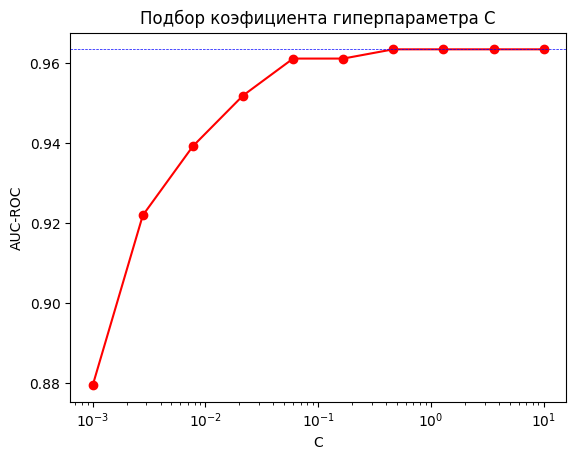

In [22]:
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('AUC-ROC')
plt.title('Подбор коэфициента гиперпараметра C')
plt.axhline(y=roc_new_scaled, linewidth=.5, color='b', linestyle='dashed')
plt.show()

## Контрольные вопросы

### **1. Какие методы классификации являются линейными? Укажите основные параметры линейной модели классификации.**

Линейные методы классификации включают в себя следующие алгоритмы:

1. Логистическая регрессия (Logistic Regression)
2. Линейный дискриминантный анализ (Linear Discriminant Analysis)
3. Линейный метод опорных векторов (Linear Support Vector Machine)

Основные параметры линейной модели классификации:

1. **Свободный член (intercept)**: Константное значение, добавляемое к линейной комбинации признаков.
2. **Коэффициенты признаков (coefficients)**: Веса, определяющие важность каждого признака в модели.
3. **Функция потерь (loss function)**: Функция, которая измеряет ошибку между предсказанными и фактическими значениями.
4. **Регуляризация (regularization)**: Метод контроля переобучения путем добавления штрафа за сложность модели.
5. **Оптимизатор (optimizer)**: Алгоритм оптимизации, используемый для обучения модели.

Линейные модели классификации хорошо работают в случаях, когда зависимость между признаками и целевой переменной линейна или близка к линейной. Они являются простыми, интерпретируемыми и эффективными для больших объемов данных.

### **2. Что такое гиперпараметры линейной модели?**

Гиперпараметры линейной модели - это параметры модели, которые не могут быть обучены непосредственно из данных во время процесса обучения. Гиперпараметры должны быть настроены до начала обучения модели и они остаются постоянными в течение всего процесса обучения. Гиперпараметры влияют на процесс обучения модели и на ее способность обобщения на новые данные.

Примеры гиперпараметров линейной модели:

1. **Параметр регуляризации (regularization parameter)**: Определяет степень регуляризации модели. Увеличение параметра регуляризации уменьшает переобучение, но может привести к недообучению.
   
2. **Тип регуляризации (regularization type)**: Может быть L1 (Lasso) или L2 (Ridge). L1-регуляризация использует штраф на сумму абсолютных значений весов, тогда как L2-регуляризация использует штраф на сумму квадратов весов.

3. **Скорость обучения (learning rate)**: Определяет размер шага при обновлении весов модели в процессе оптимизации. Выбор оптимальной скорости обучения важен для сходимости модели.

4. **Количество эпох (number of epochs)**: Количество итераций обучения, которые модель должна выполнить на всем наборе данных.

5. **Батч-размер (batch size)**: Количество образцов, используемых для обновления весов модели за одну итерацию обучения.

Настройка гиперпараметров линейной модели является важным этапом при построении модели, так как правильный выбор гиперпараметров может значительно повлиять на качество модели и ее способность обобщения на новые данные.

### **3. Поясните назначение и принципы реализации методов стохастического градиента.**

Методы стохастического градиента (Stochastic Gradient Descent, SGD) являются популярными методами оптимизации, используемыми для обучения моделей машинного обучения. Они основаны на градиентном спуске, который является общим методом оптимизации для минимизации функции потерь.

**Назначение методов стохастического градиента:**

1. **Обучение моделей:** Методы стохастического градиента используются для обновления параметров модели с целью минимизации функции потерь на обучающем наборе данных.
   
2. **Ускорение обучения:** Поскольку градиенты вычисляются на подмножествах данных (mini-batches), SGD может быть более эффективным и быстрым для обучения на больших объемах данных.

**Принципы реализации методов стохастического градиента:**

1. **Стохастичность (Stochasticity):** Градиент вычисляется на основе случайно выбранного подмножества данных (mini-batch) вместо полного набора данных. Это позволяет ускорить процесс обучения и обрабатывать большие объемы данных.

2. **Шаг обучения (Learning Rate):** Определяет размер шага при обновлении весов модели. Выбор оптимальной скорости обучения важен для сходимости модели. Слишком большой шаг может привести к осцилляциям, а слишком маленький - к медленной сходимости.

3. **Регуляризация (Regularization):** Методы стохастического градиента могут использовать L1 или L2 регуляризацию для предотвращения переобучения модели.

4. **Момент (Momentum):** Дополнительный параметр, который учитывает предыдущие обновления весов для ускорения сходимости и предотвращения осцилляций.

5. **Адаптивный шаг обучения (Adaptive Learning Rate):** Некоторые варианты SGD, такие как Adam и RMSprop, адаптивно изменяют скорость обучения для каждого параметра в процессе обучения.

Методы стохастического градиента широко применяются в глубоком обучении и других областях машинного обучения благодаря их эффективности и скорости обучения на больших объемах данных.

### **4. Что такое "линейно разделимая выборка"?**

"Линейно разделимая выборка" - это термин, используемый в контексте задач классификации, чтобы описать выборку данных, которая может быть идеально разделена линейной гиперплоскостью на два класса. Другими словами, существует прямая (в двумерном случае) или гиперплоскость (в многомерном случае), которая может точно разделить объекты разных классов без ошибок.

Основные характеристики линейно разделимой выборки:

1. **Линейная разделимость:** Объекты разных классов можно идеально разделить линейной гиперплоскостью без ошибок классификации.

2. **Отсутствие перекрывающихся областей:** Объекты каждого класса находятся в отдельных областях пространства признаков, и нет перекрывающихся областей между классами.

3. **Простота классификации:** Из-за четкого разделения классов линейно разделимая выборка обеспечивает простоту классификации и высокую точность модели.

4. **Идеальная разделимость:** В идеальном случае линейно разделимая выборка позволяет модели безошибочно классифицировать объекты на основе их признаков.

Хотя понятие линейно разделимой выборки полезно для понимания основ классификации, в реальных задачах часто встречаются выборки, которые не являются линейно разделимыми. В таких случаях могут использоваться более сложные модели классификации, такие как ядерные методы опорных векторов (SVM) или нейронные сети, чтобы обработать нелинейные зависимости между признаками и целевой переменной.

## **Вывод**

В ходе лабораторной работы, направленной на овладение технологией внедрения алгоритмов линейной классификации в приложения, изучение основных приемов работы с разреженными матрицами в машинном обучении, освоение техники построения, обучения и оценки модели логистической регрессии, а также приемов работы с синтезированными признаками, масштабированием и настройкой гиперпараметров, были достигнуты следующие результаты:

1. Установлены и настроены необходимые инструменты и библиотеки для реализации алгоритмов линейной классификации в приложения.
2. Изучены основные принципы работы с разреженными матрицами, что позволит эффективно обрабатывать данные с разреженной структурой.
3. Освоены методы построения, обучения и оценки модели логистической регрессии, что дает возможность применять этот метод для задач классификации.
4. Получены навыки работы с синтезированными признаками, их масштабирования и оптимизации гиперпараметров, что способствует улучшению качества моделей машинного обучения.

Эти результаты позволяют уверенно применять методы линейной классификации и логистической регрессии в практических задачах машинного обучения, а также эффективно работать с разреженными данными и оптимизировать процесс обучения моделей.